# Exploring the Impacts of Sociodemographic Factors and Economic Development on Marriage: A Multivariate Regression Analysis 

## Model Preparation

We will be using the following Python libraries in this lab:

In [3]:
# Import libraries
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Firstly, we read in the data `DATA` wrangling from R.

In [5]:
# Input DATA
DATA=pd.read_csv("Aggregated_Data.csv")

To choose the best linear regression model from a set of potential models, we use a few different criterias, such as AIC, BIC, and R-squared.

A lower AIC value indicates a better fit of the model to the data. Like AIC, a lower BIC value indicates a better fit of the model to the data.

Adjusted R-squared measures the proportion of the variation in the dependent variable that is explained by the independent variable. 

To choose the best linear regression model, we select the model with the lowest AIC and BIC values and the highest R-squared value. This will ensure that the model fits the data well and that it is not too complex, which can lead to overfitting.

In [6]:
# Create empty list
AIC=[]
BIC=[]
Radj=[]

Correlation graphs can help to identify which variables are most strongly correlated, or related, to each other. Since we have identified potentially important variables from correlation matrix in R. We use linear regression to build a model that predicts the value of one variable based on the value of other variables.

## Regression Modelling use MarriageRate as Response Variable

For MarriageRate, GDPpercapita, GDPgrowth and Medianage have relatively higher correlations than other variables. Hence we fit 3 single linear regression models as below.

The single linear regression model we will be fitting to MarriageRate are given as:

$$y_i = \alpha + \beta_1 x_{1i} + \epsilon_i, ~~~~ \epsilon \sim N(0, \sigma^2),$$

where

  * $y_i$ is the MarriageRate of the $i^{th}$ individual;
  * $\alpha$ is the intercept and positions the best-fitting plane in 3D space;
  * $\beta_1$ is the coefficient for the first explanatory variable $x_1$;
  * $\epsilon_i$ is the $i^{th}$ random error component.

In [7]:
#Fit regression models
model1=ols('MarriageRate~GDPpercapita',data=DATA)
result1=model1.fit()
AIC.append(result1.aic)
BIC.append(result1.bic)
Radj.append(result1.rsquared_adj)

model2=ols('MarriageRate~GDPgrowth',data=DATA)
result2=model2.fit()
AIC.append(result2.aic)
BIC.append(result2.bic)
Radj.append(result2.rsquared_adj)

model3=ols('MarriageRate~Medianage',data=DATA)
result3=model3.fit()
AIC.append(result3.aic)
BIC.append(result3.bic)
Radj.append(result3.rsquared_adj)

### Model Selection using AIC,BIC,adjust R-Square

In [8]:
# Model selection table1
data1={'model':['model1','model2','model3'],'AIC':AIC,'BIC':BIC,'Radj':Radj}
df1=pd.DataFrame(data1)
print(df1)

    model         AIC         BIC      Radj
0  model1  470.114328  475.422249  0.123068
1  model2  478.094359  483.402279  0.053823
2  model3  477.925933  483.233853  0.055340


We can see model fitting `MarriageRate~GDPpercapita` is better.
From our correlation table we can see that the correlation between GDPpercapita and two other explanatory variables are **-0.46** and **0.5**, which are relatively moderate linear relationship. Hence, there is a high degree of collinearity between them, so we keep this as our optimal model.

### Model Analysis

                            OLS Regression Results                            
Dep. Variable:           MarriageRate   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     15.60
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           0.000144
Time:                        14:10:29   Log-Likelihood:                -233.06
No. Observations:                 105   AIC:                             470.1
Df Residuals:                     103   BIC:                             475.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.2432      0.352     20.555   

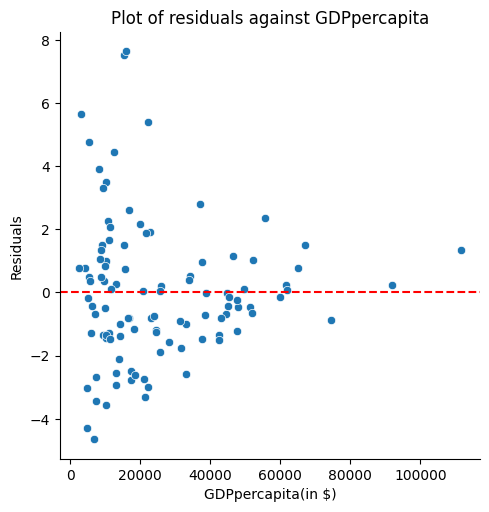

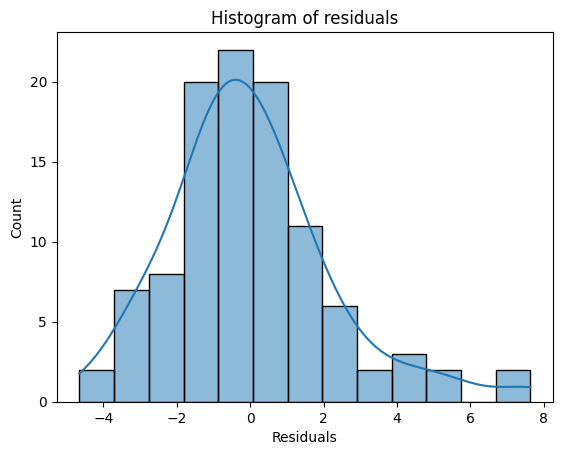

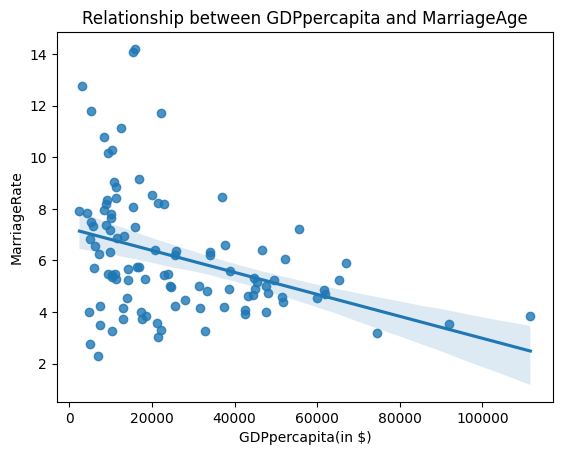

In [9]:
# Model Summary
print(result1.summary())
# Graphs of residuals 
ax1_1=sns.relplot(x=DATA['GDPpercapita'],y=result1.resid)
ax1_1.set(xlabel='GDPpercapita(in $)',ylabel='Residuals',title='Plot of residuals against GDPpercapita')
plt.axhline(y=0,ls="--",color="red")
plt.show()
ax1_2=sns.histplot(x=result1.resid,kde=True)
ax1_2.set(xlabel='Residuals',title='Histogram of residuals')
plt.show()
# Fitting plot
ax1_3=sns.regplot(data=DATA,x = 'GDPpercapita', y = 'MarriageRate', fit_reg = True)
ax1_3.set(xlabel='GDPpercapita(in $)',ylabel='MarriageRate',title='Relationship between GDPpercapita and MarriageAge')
plt.show()

After building this simple linear regression model, we noticed that the residual plot, the fit of predicted values to original values, as well as the AIC and BIC values were not ideal. Therefore, we decided to take the logarithm of both the independent and dependent variables and redo the linear regression model.

By taking the logarithm of the variables and rebuilding the linear regression model, we will be able to test whether this transformation improved the fit of the model to the data. If the new model has a better residual plot, the fit of predicted values to original values, and the AIC and BIC values, it would suggest that the logarithmic transformation was effective in improving the fit of the model to the data.

### Log Transfer

In [10]:
# log transfer
MarriageRate_log=np.log(DATA['MarriageRate'])
GDPpercapita_log=np.log(DATA['GDPpercapita'])
DATA1=pd.DataFrame({'GDPpercapita_log':GDPpercapita_log,'MarriageRate_log':MarriageRate_log})

### Model Analysis

In [11]:
# model1_log fit and summary
model1_log=ols('MarriageRate_log~GDPpercapita_log',data=DATA)
result1_log=model1_log.fit()
print(result1_log.summary())

                            OLS Regression Results                            
Dep. Variable:       MarriageRate_log   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     14.13
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           0.000283
Time:                        14:10:41   Log-Likelihood:                -36.054
No. Observations:                 105   AIC:                             76.11
Df Residuals:                     103   BIC:                             81.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.2798      0.409  

#### Inference using Confidence Interval and p-value

To evaluate this linear regression model, we consider the P-values, confidence intervals for each independent variable.
* P-value here are 0.000 for intercept and GDPpercapita (both less than 0.05). 
* The 95% confidence interval doesn't contain 0, which indicates these 2 parameters are significantly different from 0.
So, there is a sufficient evidence of a linear relationship between `GDPpercapita_log` and `MarriageRate_log`.

This tells us that our best-fitting line to the data is:

$$
\widehat{\log(\text{MarriageRate\_log})}
= \widehat{\alpha}
+ \widehat{\beta}\,\log(x_i)
= 3.2798
- 0.1556 \cdot \log(\text{GDPpercapita\_log})
$$


where

  * $\widehat{\alpha} = 3.2798$ is the intercept coefficient and means that, for any instructor with a `log(GDPpercapita_log) = 0`, their average `log(MarriageRate_log)` would be 3.2798.
  * $\widehat{\beta} = 0.1556$ is the slope coefficient associated with the exploratory variable `log(GDPpercapita_log）`, and summarises the relationship between `log(Marriage Rate_log)` and `log(GDPpercapita_log)`. That is, as `log(GDPpercapita_log)` increases, `log(MarriageRate_log)` will decreases, such that
    * For every 1 unit increase in `log(GDPpecapita_log)`, there is an associated decrease of, on average, 0.1556 units of `log(MarriageRate_log)`.

#### Assumptions Checking

After fitting a simple linear model, we need to check 3 assumptions to make sure the model is appeopriate. 
Residuals plots are as follows:

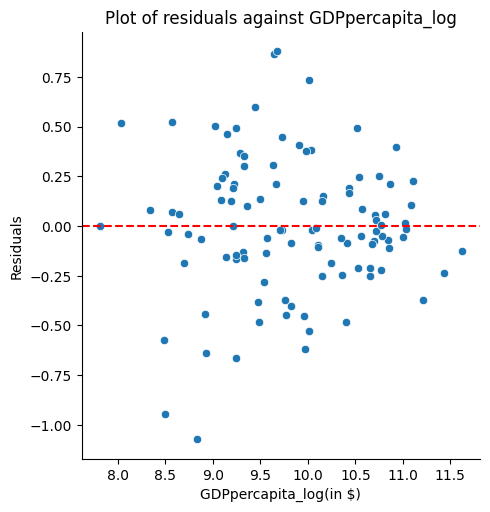

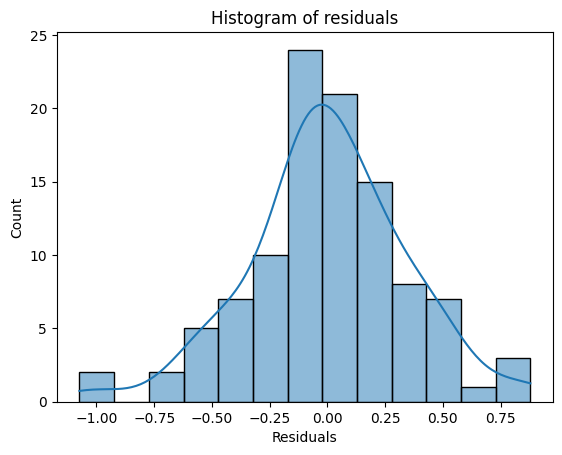

In [12]:
# Graphs of residuals 
ax1_log_1=sns.relplot(x=DATA1['GDPpercapita_log'],y=result1_log.resid)
ax1_log_1.set(xlabel='GDPpercapita_log(in $)',ylabel='Residuals',title='Plot of residuals against GDPpercapita_log')
plt.axhline(y=0,ls="--",color="red")
plt.show()
ax1_log_2=sns.histplot(x=result1_log.resid,kde=True)
ax1_log_2.set(xlabel='Residuals',title='Histogram of residuals')
plt.show()

From the plot of the residuals against the fitted values, we can conclude that:
* The residuals have mean zero.
* The residuals have constant varianve across all levels of the fitted valuse.
From the histogram plot of the residuals, we can conclude that:
* The histogram is bellshped and centred at zero, so it's normally distributed.

#### Fitting plot

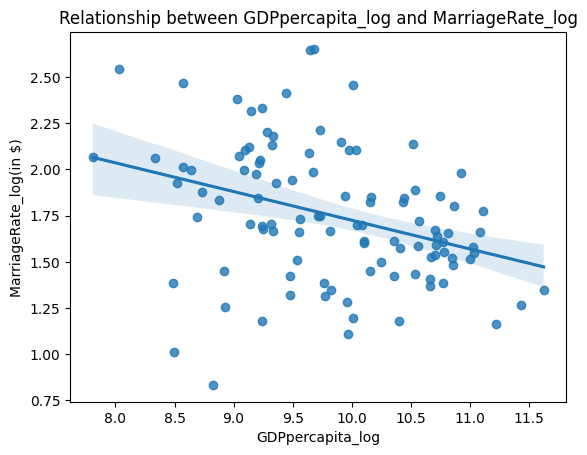

In [13]:
ax1_log_3=sns.regplot(data=DATA1,x = 'GDPpercapita_log', y = 'MarriageRate_log', fit_reg = True)
ax1_log_3.set(xlabel='GDPpercapita_log',ylabel='MarriageRate_log(in $)',title='Relationship between GDPpercapita_log and MarriageRate_log')
plt.show()

## Regression Modelling use MarriageAge as Response Variable

Based on the correlation matrix, four out of five indicators show strong correlation with p-values less than 0.01, except for the GDP per capita, which exhibits multicollinearity. To select the best regression model, we adopt a forward stepwise approach starting from the Medianage and adding one variable at a time based on the correlation values.

In [14]:
AIC=[]
BIC=[]
Radj=[]

model4=ols('FirstMarriageAge~Medianage',data=DATA)
result4=model4.fit()
AIC.append(result4.aic)
BIC.append(result4.bic)
Radj.append(result4.rsquared_adj)

model5=ols('FirstMarriageAge~Medianage+Schoolingyear',data=DATA)
result5=model5.fit()
AIC.append(result5.aic)
BIC.append(result5.bic)
Radj.append(result5.rsquared_adj)

model6=ols('FirstMarriageAge~Medianage+Schoolingyear+GDPgrowth',data=DATA)
result6=model6.fit()
AIC.append(result6.aic)
BIC.append(result6.bic)
Radj.append(result6.rsquared_adj)

model7=ols('FirstMarriageAge~Medianage+Schoolingyear+GDPgrowth+Mental_Disorders',data=DATA)
result7=model7.fit()
AIC.append(result7.aic)
BIC.append(result7.bic)
Radj.append(result7.rsquared_adj)

### Model Selection using AIC, BIC, adjust R-Square

The best model is determined using three criterias, AIC, BIC, and R-adj,as above.

In [15]:
# Model selection table
data2={'model':['model4','model5','model6','model7'],'AIC':AIC,'BIC':BIC,'Radj':Radj}
df2=pd.DataFrame(data2)
print(df2)

    model         AIC         BIC      Radj
0  model4  467.714462  473.022383  0.450152
1  model5  464.392350  472.354231  0.472204
2  model6  417.013790  427.629631  0.666951
3  model7  414.863486  428.133288  0.676657


We can see model7 is the best, and further investigation will be conducted accordingly.

### Model Analysis

In [16]:
#Model summary
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:       FirstMarriageAge   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     55.41
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.52e-24
Time:                        14:11:11   Log-Likelihood:                -202.43
No. Observations:                 105   AIC:                             414.9
Df Residuals:                     100   BIC:                             428.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           14.6329      1.427  

### Inference using Confidence Interval and p-value

To evaluate this linear regression model, we consider the P-values, confidence intervals for each independent variable.
* P-value here are 0.000 for intercept, Medianage, and GDPgrowth; 0.001 for Schoolingyear; 0.047 for Mental_Disorders(both less than 0.05).
* The 95% confidence interval doesn't contain 0, which indicates these 4 parameters are significantly different from 0. 

So, there is a sufficient evidence of a multiple linear relationship between Medianage, GDPgrowth, Schoolingyear, Mental_Disorders and FirstMarriageAge.

This tells us that our best-fitting line to the data is:

$$
\widehat{\text{FirstMarriageAge}}
=
14.6329
+ 0.2129\,\text{*Medianage}
+ 0.3515\,\text{*Schoolingyear}
- 0.6179\,\text{*GDPgrowth}
+ 0.1673\,\text{*Mental\_Disorders}
$$

The variables, except for gdpgrowth, are positively correlated to FirstMarriageAge.

### Assumptions Checking

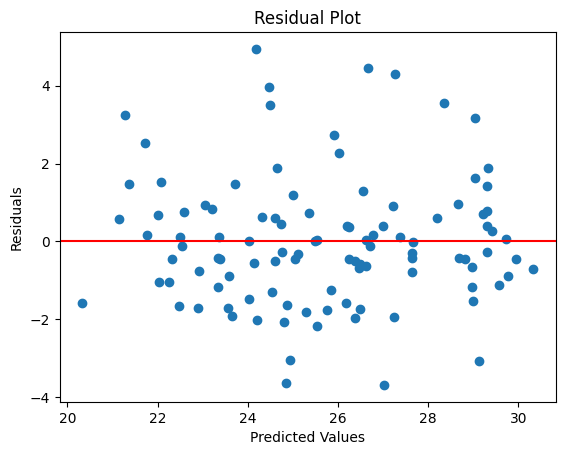

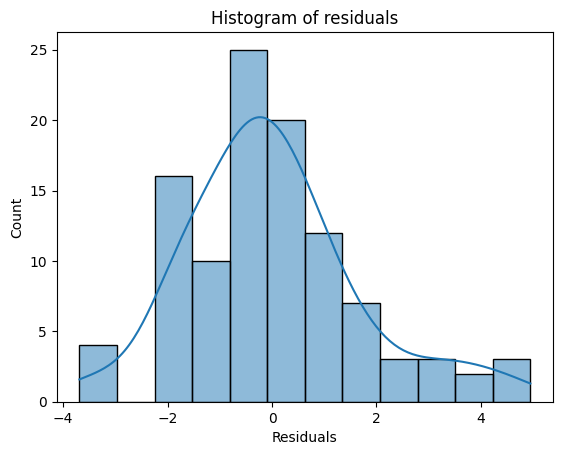

In [17]:
# Total residual plots
model7_pre=result7.predict(DATA.iloc[:,[4,5,7,8]]) #Extract predicted values
y7_true=DATA.iloc[:,3] #Extract true values
residuals7 = y7_true - model7_pre
fig, ax7_1 = plt.subplots()
ax7_1.scatter(model7_pre, residuals7)
ax7_1.axhline(y=0, color='r', linestyle='-')
ax7_1.set_xlabel('Predicted Values')
ax7_1.set_ylabel('Residuals')
ax7_1.set_title('Residual Plot')
plt.show()
ax7_1=sns.histplot(x=result7.resid,kde=True)
ax7_1.set(xlabel='Residuals',title='Histogram of residuals')
plt.show()

From the plot of the residuals against the fitted values, we can conclude that:
* The residuals have mean zero.
* The residuals have constant varianve across all levels of the fitted valuse.
From the histogram plot of the residuals, we can conclude that:
* The histogram is bellshped and almost centred at zero(only a little right_skewed), so it can be considered normally distributed.

### Fitting plot

This scatter plot of predicted values versus true values is useful for evaluating the performance of a regression model. The closeness of the points to the line y = x indicates the accuracy of the model's predictions.

C:\Users\Bashiru\AppData\Local\Temp\ipykernel_19284\4246288333.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(model7_pre), max(model7_pre)], [min(y7_true), max(y7_true)], 'k--', lw=2,color='red')


Text(0.5, 1.0, 'Scatter Plot of Predicted Values Versus True Values')

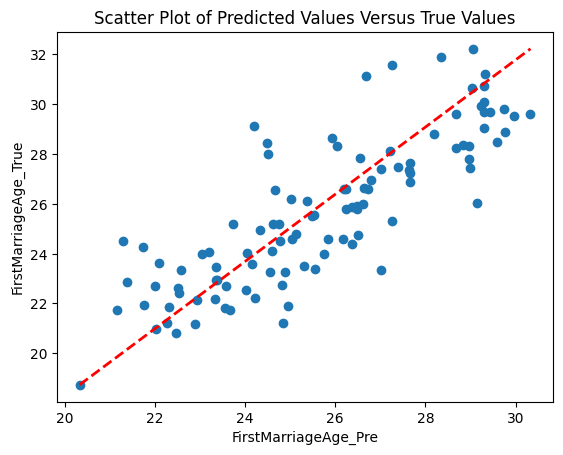

In [18]:
plt.scatter(model7_pre,y7_true)
plt.plot([min(model7_pre), max(model7_pre)], [min(y7_true), max(y7_true)], 'k--', lw=2,color='red') 
plt.xlabel('FirstMarriageAge_Pre')
plt.ylabel('FirstMarriageAge_True')
plt.title('Scatter Plot of Predicted Values Versus True Values')

## Conclusion and Discussion

The findings indicate that schooling year, median age, GDP growth, and mental disorders are significant predictors of marriage age.

The positive impact of schooling years on marriage age suggests that a longer level of education may increase the age at which people get married.

The median age of a country has a positive impact on marriage age. While the negative impact of GDP growth on marriage age suggests that people tend to get married earlier in the presence of a favorable economic condition.